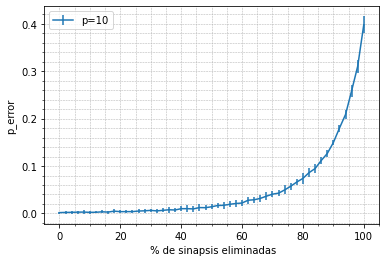

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def signo(x):
    return np.where(x > 0, 1, -1)

def p_error(muestras, N, p, pixeles_eliminados):
    salida = np.zeros((muestras, len(pixeles_eliminados)))
    
    for l in range(muestras):
        # Construyo la matriz de pesos sinápticos
        P = 2 * np.random.binomial(1, 0.4, (N, p)) - 1
        W = P @ P.T
        np.fill_diagonal(W, 0)
        
        for k in range(len(pixeles_eliminados)):
            W_aux = W.copy()
            
            # Elimino sinapsis
            vector = np.random.permutation(N * N)
            W_aux.flat[vector[:round(pixeles_eliminados[k] * N**2 / 100)]] = 0
            
            # Error global
            salida[l, k] = np.mean(signo(W_aux @ P) != P)
    
    return salida

# Parámetros
N = 100
p = 10

sinapsis_eliminadas = np.arange(0, 102, 2)
muestras = 10

# Cálculo del error
p_error1 = p_error(muestras, N, p, sinapsis_eliminadas)

# Gráficos
plt.figure(1)
plt.errorbar(sinapsis_eliminadas, np.mean(p_error1, axis=0), yerr=np.std(p_error1, axis=0), label="p=10")
plt.legend()
plt.xlabel(" % de sinapsis eliminadas")
plt.ylabel("p_error")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.show()


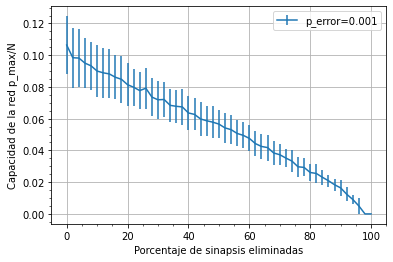

In [75]:
# Parámetros
p_error = 0.001
muestras = 100

p_max = np.zeros((len(sinapsis_eliminadas), muestras))
C = np.zeros((len(sinapsis_eliminadas), muestras))

for n in range(muestras):
    for k in range(len(sinapsis_eliminadas)):
        p = 0
        error = 0

        while error < p_error:
            p += 1

            # Construyo la matriz de pesos sinápticos
            P = 2 * np.random.binomial(1, 0.5, (N, p)) - 1
            W = P @ P.T
            np.fill_diagonal(W, 0)

            # Elimino sinapsis
            vector = np.random.permutation(N * N)
            W.flat[vector[:round(sinapsis_eliminadas[k] * N**2 / 100)]] = 0

            # Error global
            error = np.mean(signo(W @ P) != P)

        p_max[k, n] = p
        C[k, n] = (p_max[k, n]-1) / N

# Gráficos
plt.figure(1)
plt.errorbar(sinapsis_eliminadas, np.mean(C, axis=1), yerr=np.std(C, axis=1),label="p_error=0.001")
plt.legend()
plt.xlabel('Porcentaje de sinapsis eliminadas')
plt.ylabel('Capacidad de la red p_max/N')
plt.grid()
plt.minorticks_on()
plt.show()